<h1>Data Section for Business problem</h1>

In [1]:
!pip install geopy

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

# All requested packages already installed.



In [3]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 


%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') 


from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


<h1><long>In order to use the resources of Foursquare, I propose to simulate a search for the best situation if I want to visit the capital of a country in the world.<long></h1>

<h3>I did a search on google so as not to be biased in the choice of monuments to discover in each capital. my research is therefore: the name of a 
    capital + «tourist places» I had these results for these four cities : Paris, Washington, Rome, Londres</h3>

<h1>1. Data of Paris</h1>

In [5]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


<h3>Localise Lieux on the map Paris</h3>

In [7]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [8]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

<h3>Define Foursquare Credentials and Version</h3>

In [10]:
CLIENT_ID = 'QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY' 
CLIENT_SECRET = '51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QXZ045UL3H2GGQJM2XAUZJKWEKMVK4ZRAJY1HZRRJHWR5LQY
CLIENT_SECRET:51N5AKZACCK4UHMQE1FC4VNPM3QYE42UB1NARJ1XKFH3WGMG


<h3>Explore all venue's categories in Paris</h3>

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
      
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [16]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


In [17]:
print(paris_data_venues.shape)
paris_data_venues

(340, 8)


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
5,Musée du Louvre,48.860611,2.335450,모나리자 / 라 조콘다 (Mona Lisa | La Joconde),56f279c4cd10850a585f5e31,48.860139,2.335337,Exhibit
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
8,Musée du Louvre,48.860611,2.335450,Carrousel du Louvre,4adcda1df964a5202e3921e3,48.861642,2.334217,Shopping Mall
9,Musée du Louvre,48.860611,2.335450,Pylones,4cfe0d10ee9cb60cd0979dad,48.861419,2.334143,Gift Shop


In [18]:
paris_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Arc de Triomphe,100,100,100,100,100,100,100
Musée du Louvre,90,90,90,90,90,90,90
Notre Dame de Paris,100,100,100,100,100,100,100
Tour Eiffel,50,50,50,50,50,50,50


In [19]:
df_view = paris_data_venues.groupby('Lieux').count()
df_toto = df_view['Venue Category']
df_toto

Lieux
Arc de Triomphe        100
Musée du Louvre         90
Notre Dame de Paris    100
Tour Eiffel             50
Name: Venue Category, dtype: int64

<h3>Number by Categories at these Lieux</h3>

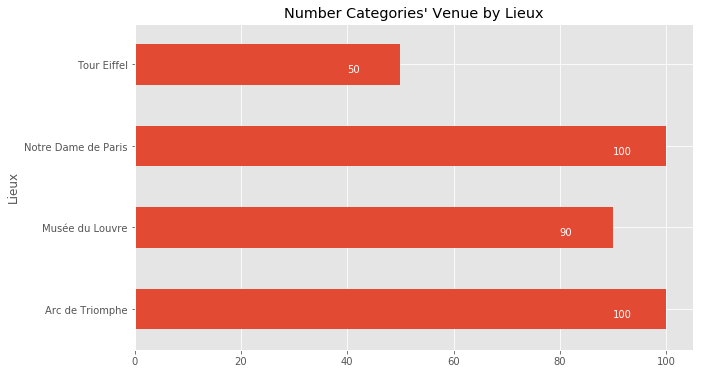

In [23]:
df_toto.plot(kind='barh', figsize=(10,6))

plt.title('Number Categories\' Venue by Lieux') 
for index, value in enumerate(df_toto): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [24]:
print('There are {} uniques categories.'.format(len(paris_data_venues['Venue Category'].unique())))
print(paris_data_venues['Venue Category'].unique() )

There are 110 uniques categories.
['Art Museum' 'Exhibit' 'Historic Site' 'Plaza' 'Pedestrian Plaza'
 'Shopping Mall' 'Gift Shop' 'Café' 'Bridge' 'Theater'
 'Italian Restaurant' 'Bakery' 'Garden' 'Hotel' 'Cosmetics Shop'
 'Coffee Shop' 'Dessert Shop' 'Sculpture Garden' 'Bistro' 'Bar'
 'Cocktail Bar' 'Tea Room' 'Government Building' 'Furniture / Home Store'
 'Perfume Shop' 'Church' 'Shoe Store' 'Udon Restaurant' 'Museum'
 'Japanese Restaurant' 'Sandwich Place' 'Ramen Restaurant'
 'French Restaurant' 'Breakfast Spot' 'Clothing Store' 'Park'
 'Pizza Place' 'Korean Restaurant' 'Boutique' 'Arts & Crafts Store'
 'Bookstore' 'Bus Stop' 'Burger Joint' 'Tapas Restaurant' 'Ice Cream Shop'
 'Scenic Lookout' 'Lebanese Restaurant' 'Jazz Club' 'Pastry Shop'
 'Candy Store' 'Comic Shop' 'Flower Shop' 'Moroccan Restaurant'
 'Indie Movie Theater' 'Gym' 'Wine Shop' 'Cheese Shop' 'Diner'
 'Seafood Restaurant' 'Fountain' 'Pub' 'Creperie' 'Mexican Restaurant'
 'Chocolate Shop' 'History Museum' 'Juice Bar' '

<h3>Another Analyses for each venue</h3>

In [25]:
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Basque Restaurant,Beach Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Government Building,Gym,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tourist Information Center,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Wine Shop
0,Arc de Triomphe,0.000000,0.000000,0.02,0.02,0.030000,0.010000,0.00,0.00,0.020000,0.000000,0.010000,0.00,0.000000,0.01,0.000000,0.00,0.000000,0.010000,0.01,0.01,0.00,0.00,0.00,0.00,0.000000,0.020000,0.010000,0.010000,0.01,0.00,0.00,0.010000,0.01,0.01,0.000000,0.00,0.01,0.000000,0.00,0.01,0.00,0.00,0.170000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.210000,0.01,0.00,0.01,0.070000,0.020000,0.00,0.01,0.00,0.01,0.000000,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.02,0.000000,0.02,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.00,0.01,0.030000,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.02,0.01,0.00,0.02,0.00,0.01,0.00,0.000000,0.01,0.000000,0.00,0.01,0.00,0.00,0.000000,0.01,0.00
1,Musée du Louvre,0.033333,0.011111,0.00,0.00,0.022222,0.022222,0.00,0.00,0.011111,0.011111,0.011111,0.00,0.011111,0.00,0.011111,0.00,0.011111,0.055556,0.00,0.00,0.00,0.00,0.00,0.00,0.011111,0.022222,0.011111,0.055556,0.00,0.00,0.00,0.022222,0.00,0.00,0.022222,0.00,0.00,0.022222,0.00,0.00,0.00,0.00,0.155556,0.011111,0.011111,0.011111,0.011111,0.00,0.044444,0.00,0.077778,0.00,0.00,0.00,0.033333,0.033333,0.00,0.00,0.00,0.00,0.011111,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.022222,0.00,0.00,0.011111,0.00,0.011111,0.011111,0.011111,0.00,0.055556,0.00,0.011111,0.00,0.00,0.00,0.022222,0.00,0.00,0.011111,0.00,0.011111,0.011111,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.011111,0.00,0.011111,0.00,0.00,0.00,0.00,0.011111,0.00,0.00
2,Notre Dame de Paris,0.000000,0.010000,0.01,0.00,0.040000,0.040000,0.01,0.00,0.040000,0.040000,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.000000,0.040000,0.01,0.00,0.00,0.01,0.00,0.01,0.020000,0.000000,0.010000,0.030000,0.00,0.01,0.00,0.010000,0.02,0.00,0.010000,0.01,0.00,0.000000,0.01,0.00,0.01,0.01,0.110000,0.000000,0.020000,0.000000,0.000000,0.01,0.020000,0.01,0.050000,0.00,0.02,0.01,0.000000,0.030000,0.01,0.00,0.01,0.00,0.000000,0.02,0.00,0.01,0.01,0.03,0.01,0.00,0.00,0.01,0.00,0.000000,0.00,0.00,0.010000,0.02,0.010000,0.000000,0.000000,0.00,0.040000,0.02,0.000000,0.00,0.00,0.00,0.000000,0.00,0.01,0.000000,0.02,0.000000,0.000000,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.000000,0.00,0.010000,0.00,0.00,0.00,0.00,0.000000,0.00,0.01
3,Tour Eiffel,0.020000,0.000000,0.00,0.00,0.060000,0.020000,0.00,0.02,0.000000,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.00,0.000000,0.040000,0.00,0.00,0.02,0.00,0.02,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.02,0.000000,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00

In [27]:
num_top_venues = 20

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                      venue  freq
0                     Hotel  0.21
1         French Restaurant  0.17
2        Italian Restaurant  0.07
3                    Bakery  0.03
4            Sandwich Place  0.03
5       Japanese Restaurant  0.02
6                Steakhouse  0.02
7                 Nightclub  0.02
8               Men's Store  0.02
9            Clothing Store  0.02
10                      Spa  0.02
11            Movie Theater  0.02
12                   Bistro  0.02
13               Bagel Shop  0.02
14         Asian Restaurant  0.02
15                      Bar  0.01
16                Roof Deck  0.01
17  Scandinavian Restaurant  0.01
18      Indie Movie Theater  0.01
19            Jewelry Store  0.01


----Musée du Louvre----
                  venue  freq
0     French Restaurant  0.16
1                 Hotel  0.08
2                  Café  0.06
3                 Plaza  0.06
4           Coffee Shop  0.06
5         Historic Site  0.04
6            Art Museum  0

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro,Steakhouse,Movie Theater,Spa,Clothing Store,Nightclub,Vegetarian / Vegan Restaurant,Cantonese Restaurant,Jewelry Store,Optical Shop,Moroccan Restaurant
1,Musée du Louvre,French Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum,Bar,Sandwich Place,Clothing Store,Dessert Shop,Exhibit,Cosmetics Shop,Bakery,Government Building,Theater,Pizza Place
2,Notre Dame de Paris,French Restaurant,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Pub,Lebanese Restaurant,Pastry Shop,Church,Creperie,Burger Joint,Seafood Restaurant,Historic Site,Ice Cream Shop
3,Tour Eiffel,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant,Convenience Store,Deli / Bodega,Romanian Restaurant,Bar,Gift Shop,Library,Monument / Landmark,Pedestrian Plaza,Pizza Place,Playground


In [30]:
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

kmeans.labels_[0:10]

array([0, 1, 1, 2], dtype=int32)

In [31]:
paris_merged = paris_data

paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum,Bar,Sandwich Place,Clothing Store,Dessert Shop,Exhibit,Cosmetics Shop,Bakery,Government Building,Theater,Pizza Place
1,Notre Dame de Paris,48.852968,2.347708,1,French Restaurant,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Pub,Lebanese Restaurant,Pastry Shop,Church,Creperie,Burger Joint,Seafood Restaurant,Historic Site,Ice Cream Shop
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro,Steakhouse,Movie Theater,Spa,Clothing Store,Nightclub,Vegetarian / Vegan Restaurant,Cantonese Restaurant,Jewelry Store,Optical Shop,Moroccan Restaurant
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant,Convenience Store,Deli / Bodega,Romanian Restaurant,Bar,Gift Shop,Library,Monument / Landmark,Pedestrian Plaza,Pizza Place,Playground


In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Cluster 0</h3>

In [33]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,48.860611,Hotel,Plaza,Café,Coffee Shop,Historic Site,Italian Restaurant,Japanese Restaurant,Art Museum,Museum,Bar,Sandwich Place,Clothing Store,Dessert Shop,Exhibit,Cosmetics Shop,Bakery,Government Building,Theater,Pizza Place


<h3>Cluster 1</h3>

In [34]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,48.852968,Hotel,Plaza,Bistro,Café,Bookstore,Bakery,Bar,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Pub,Lebanese Restaurant,Pastry Shop,Church,Creperie,Burger Joint,Seafood Restaurant,Historic Site,Ice Cream Shop
2,48.873792,French Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Men's Store,Japanese Restaurant,Asian Restaurant,Bistro,Steakhouse,Movie Theater,Spa,Clothing Store,Nightclub,Vegetarian / Vegan Restaurant,Cantonese Restaurant,Jewelry Store,Optical Shop,Moroccan Restaurant


<h3>Cluster 2</h3>

In [35]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,48.85837,Italian Restaurant,Bakery,Hotel,Café,Plaza,Garden,Brasserie,Champagne Bar,Chinese Restaurant,Convenience Store,Deli / Bodega,Romanian Restaurant,Bar,Gift Shop,Library,Monument / Landmark,Pedestrian Plaza,Pizza Place,Playground


<h1>
Graphical representations and frames will be added along the lines of my research proposal of the best places to visit a capital.</h1>